In [44]:
#property1 extracted from property raw having multiple logics,Dont remove
#property1 copy
#150,154,152,155,158,160,208,204,198,279,
changes in 218--changing target based encoding to normal way
columns available ,but not considering------------------'InteriorsStyle','Material', 'Architecture',
'SubModel',  'State',
       
2nd style

addind rank to target based encoding values and doing minmax scaling to columns---previously handled on mean
optimized randomforest classifier  to reduced time by reducing the parameters values 
importing smorte for oversampling


3rd style  
I believe oversampling is happening because of not considering these columns----wrong thought----% of target is enough
'InteriorsStyle','Material', 'Architecture','SubModel',  'State',---lets check the % of target with columns in powerbi reports
oversampling issue--used hybrid---
 Combination of SMOTE and Undersampling:
You can use a hybrid technique that combines SMOTE for oversampling the minority class and undersampling to reduce the majority class.


4th style    
why hash encoding instead of label and one hot ----multiple values in columns like 40 ,60,84
'InteriorsStyle','Material', 'Architecture','SubModel',  'State',----hash encoding techniques  workout successfully



SyntaxError: invalid decimal literal (3271592435.py, line 8)

In [3]:
import pandas as pd

# Step 1: Set the CSV file URL
csv_url = 'https://raw.githubusercontent.com/Chaitanyagithubacc/Machine-Learning/main/Datasets/Property/Property_train.csv'
csv_url_test='https://raw.githubusercontent.com/Chaitanyagithubacc/Machine-Learning/main/Datasets/Property/Property_test_share.csv'
# Step 2: Read the CSV file directly (first row as header)
Property = pd.read_csv(csv_url, header=0)  # header=0 ensures the first row is used as column headers
Property_test = pd.read_csv(csv_url_test, header=0) 
# Step 3: Display the structure of the DataFrame
print("Columns in the DataFrame:", Property.columns)
print("Sample data in the DataFrame:", Property.head())


Columns in the DataFrame: Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'EnvRating', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'PRIMEUNIT', 'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType',
       'Architecture', 'PriceIndex3', 'Region', 'PriceIndex5', 'SubModel',
       'Facade', 'State', 'NormalisedPopulation', 'BuildYear', 'RegionType',
       'PropertyAge', 'PriceIndex2'],
      dtype='object')
Sample data in the DataFrame:    Junk InteriorsStyle PriceIndex8   ListDate Material  PriceIndex9 Agency  \
0     0           6LLJ     14674.0   9/7/2010     UT7W         8270   CAT3   
1     1           XZ9F      4172.0   1/7/2009     PRN0         3890   CAT2   
2     0           QWEV      8210.0  6/23/2010     A9RA         5900   CAT1   
3     0           MK2K      7309.0  3/19/2009     RRJQ         7460  OTHER   
4     0           GK4G      9182.0   3/3/2010

In [4]:
import pandas as pd

Property['data']='train'
Property_test['data']='test'

extra_in_train = set(Property.columns) - set(Property_test.columns)
extra_in_test = set(Property_test.columns) - set(Property.columns)

print("Extra columns in train_dataset:", extra_in_train)
print("Extra columns in testing_dataset:", extra_in_test)

all_data=pd.concat([Property,Property_test],0,sort=False)

print("\nConcatenated DataFrame:")
print(all_data)

Extra columns in train_dataset: {'Junk'}
Extra columns in testing_dataset: set()


TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [50]:
Property.shape

(62035, 32)

In [52]:
Property_duplicated=Property.duplicated().value_counts()
Property_duplicated.head()

False    62035
Name: count, dtype: int64

In [54]:
Property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62035 entries, 0 to 62034
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Junk                   62035 non-null  int64 
 1   InteriorsStyle         62035 non-null  object
 2   PriceIndex8            62035 non-null  object
 3   ListDate               62035 non-null  object
 4   Material               62035 non-null  object
 5   PriceIndex9            62035 non-null  int64 
 6   Agency                 62035 non-null  object
 7   AreaIncomeType         62035 non-null  object
 8   EnvRating              62035 non-null  object
 9   PriceIndex7            62035 non-null  object
 10  ExpeditedListing       62035 non-null  int64 
 11  PriceIndex4            62035 non-null  object
 12  PriceIndex1            62035 non-null  object
 13  PriceIndex6            62035 non-null  object
 14  PRIMEUNIT              62035 non-null  object
 15  Channel            

In [119]:
Property.head(5)

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,missing,13143.0,0,14224.0,9217.0,10387.0,missing,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,missing,3461.0,0,4404.0,2958.0,3400.0,missing,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,missing,6922.0,0,8952.0,4568.0,4862.0,missing,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,missing,6300.0,0,7460.0,5361.0,6305.0,missing,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,missing,8330.0,0,9846.0,5428.0,5718.0,missing,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0


In [3]:
import pandas as pd


null_counts = Property.isnull().sum()
null_counts_percentage = (Property.isnull().sum() / len(Property)) * 100
data_types = Property.dtypes

combined_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null counts%': null_counts_percentage,
    'Data Type': data_types
})

combined_info = combined_info.sort_values(by='Null counts%', ascending=False)

print(combined_info)


                       Null Count  Null counts% Data Type
Junk                            0           0.0     int64
Zip                             0           0.0     int64
PropertyAge                     0           0.0     int64
RegionType                      0           0.0    object
BuildYear                       0           0.0     int64
NormalisedPopulation            0           0.0     int64
State                           0           0.0    object
Facade                          0           0.0    object
SubModel                        0           0.0    object
PriceIndex5                     0           0.0    object
Region                          0           0.0    object
PriceIndex3                     0           0.0    object
Architecture                    0           0.0    object
PlotType                        0           0.0    object
InsurancePremiumIndex           0           0.0     int64
Channel                         0           0.0    object
InteriorsStyle

In [5]:
import numpy as np
Numerical_1= Property.select_dtypes(include=[np.number])
Numerical_1.head()


,Junk,PriceIndex9,ExpeditedListing,Zip,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge
0,0,8270,0,21075,623,42077,2008,2
1,1,3890,0,73129,1689,77258,2002,7
2,0,5900,0,29697,2351,94514,2004,6
3,0,7460,0,28273,1933,82302,2002,7
4,0,6400,0,29697,482,49176,2007,3


In [7]:
# Calculate the percentage of missing values for all columns
missing_percentage = Property.eq('missing').mean() * 100

# Convert the result to a DataFrame for better presentation
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage (%)']

missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage (%)', ascending=False)

# Display the missing value percentages
print(missing_percentage_df)


                   Column  Missing Percentage (%)
14              PRIMEUNIT               95.255904
8               EnvRating               95.255904
7          AreaIncomeType                4.313694
2             PriceIndex8                0.438462
22            PriceIndex5                0.438462
13            PriceIndex6                0.438462
9             PriceIndex7                0.438462
30            PriceIndex2                0.022568
11            PriceIndex4                0.022568
12            PriceIndex1                0.022568
20            PriceIndex3                0.022568
21                 Region                0.009672
6                  Agency                0.008060
28             RegionType                0.008060
24                 Facade                0.008060
27              BuildYear                0.000000
25                  State                0.000000
23               SubModel                0.000000
29            PropertyAge                0.000000


In [7]:
Property = Property.drop(columns=['PRIMEUNIT', 'EnvRating']) #-----more missing values
Property = Property.drop(columns=['Region']) #---only 1 unique value
print(Property.columns)


Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType', 'Architecture',
       'PriceIndex3', 'PriceIndex5', 'SubModel', 'Facade', 'State',
       'NormalisedPopulation', 'BuildYear', 'RegionType', 'PropertyAge',
       'PriceIndex2'],
      dtype='object')


In [9]:
# Define the columns to process
filter_columns = ['PriceIndex8', 'PriceIndex7', 'PriceIndex1', 'PriceIndex2', 'PriceIndex3', 'PriceIndex4', 'PriceIndex5', 'PriceIndex6']

# Convert missing values to 0 and change the datatype to float
for col in filter_columns:
    Property[col] = Property[col].replace("missing", 0).fillna(0).astype(float)
    median_value = Property[col].median() 
    Property[col] = Property[col].replace(0, median_value)
# Display the updated DataFrame to verify changes
print(Property[filter_columns].dtypes)


PriceIndex8    float64
PriceIndex7    float64
PriceIndex1    float64
PriceIndex2    float64
PriceIndex3    float64
PriceIndex4    float64
PriceIndex5    float64
PriceIndex6    float64
dtype: object


In [13]:
# Calculate the percentage of missing values for all columns
missing_percentage = Property.eq('missing').mean() * 100

# Convert the result to a DataFrame for better presentation
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage (%)']

missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage (%)', ascending=False)

# Display the missing value percentages
print(missing_percentage_df)


                   Column  Missing Percentage (%)
7          AreaIncomeType                4.313694
25             RegionType                0.008060
6                  Agency                0.008060
21                 Facade                0.008060
0                    Junk                0.000000
15  InsurancePremiumIndex                0.000000
26            PropertyAge                0.000000
24              BuildYear                0.000000
23   NormalisedPopulation                0.000000
22                  State                0.000000
20               SubModel                0.000000
19            PriceIndex5                0.000000
18            PriceIndex3                0.000000
17           Architecture                0.000000
16               PlotType                0.000000
14                    Zip                0.000000
1          InteriorsStyle                0.000000
13                Channel                0.000000
12            PriceIndex6                0.000000


In [15]:
import pandas as pd

# Automatically selecting all numeric columns (both int and float) from the 'Property' DataFrame
Numerical_cols = Property.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column
for cat in Numerical_cols:
    print(f'Column Name: {cat}')
    
    # Get value counts and percentages
    value_counts = Property[cat].value_counts()
    value_percentages = Property[cat].value_counts(normalize=True) * 100  # Calculate percentage
    
    # Combine counts and percentages into a DataFrame
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percentages
    })
    
    # Display the summary
    print(summary)
    print('==============================================')


Column Name: Junk
      Count  Percentage
Junk                   
0     54433   87.745627
1      7602   12.254373
Column Name: PriceIndex8
             Count  Percentage
PriceIndex8                   
10090.0        722    1.163859
7478.0         242    0.390102
7611.0         154    0.248247
8546.0         111    0.178931
9256.0          96    0.154751
...            ...         ...
17210.0          1    0.001612
15514.0          1    0.001612
5616.0           1    0.001612
16262.0          1    0.001612
14004.0          1    0.001612

[12684 rows x 2 columns]
Column Name: PriceIndex9
             Count  Percentage
PriceIndex9                   
7500           656    1.057468
6500           506    0.815669
7200           498    0.802773
6000           495    0.797937
4200           474    0.764085
...            ...         ...
2965             1    0.001612
7476             1    0.001612
7034             1    0.001612
3120             1    0.001612
2245             1    0.001612

[20

In [13]:
categorical1=Property.select_dtypes(include=[object])
categorical1.columns

Index(['InteriorsStyle', 'ListDate', 'Material', 'Agency', 'AreaIncomeType',
       'Channel', 'PlotType', 'Architecture', 'SubModel', 'Facade', 'State',
       'RegionType'],
      dtype='object')

In [5]:
import pandas as pd

# Select categorical columns from Property DataFrame
categorical1 = Property.select_dtypes(include=[object])

# Create a dictionary to store results for each column
top_values_data = {}

# Loop through each categorical column
for col in categorical1.columns:
    # Get the top 5 most frequent values and their counts
    top_values = categorical1[col].value_counts().nlargest(5)
    
    # Calculate the percentage of these values
    top_percentages = (top_values / len(categorical1[col])) * 100
    
    # Store the top 5 values and percentages in a DataFrame for this column
    top_values_data[col] = pd.DataFrame({
        'Top Values': top_values.index,
        'Count': top_values.values,
        'Percentage (%)': top_percentages.values
    })

    # Display the DataFrame for each column
    print(f'Top 5 values for column: {col}')
    print(top_values_data[col])
    print('==============================================')

# Optional: Access each column's top 5 values DataFrame using top_values_data dictionary
# Example: top_values_data['Column_Name']


Top 5 values for column: InteriorsStyle
  Top Values  Count  Percentage (%)
0       K3BB   2012        3.243330
1       RCQE   1713        2.761344
2       WEGU   1229        1.981140
3       2XWO   1156        1.863464
4       V3Y1   1101        1.774805
Top 5 values for column: PriceIndex8
  Top Values  Count  Percentage (%)
0        0.0    431        0.694769
1    missing    272        0.438462
2     7478.0    242        0.390102
3     7611.0    154        0.248247
4     8546.0    111        0.178931
Top 5 values for column: ListDate
   Top Values  Count  Percentage (%)
0  11/23/2010    329        0.530346
1   2/25/2009    325        0.523898
2   11/3/2010    315        0.507778
3   12/8/2010    312        0.502942
4  10/13/2010    311        0.501330
Top 5 values for column: Material
  Top Values  Count  Percentage (%)
0       PRN0  11909       19.197227
1       C8A4   8657       13.955025
2       ZCI3   7938       12.796002
3       NYFD   3228        5.203514
4       X7IX   2988  

In [15]:
for col in categorical1.columns:
    mode_value = categorical1[col].mode()[0] 
    Property[col] = Property[col].replace("missing", mode_value) 

# Display the updated DataFrame to verify changes
print(Property[categorical1.columns].head()) 

  InteriorsStyle   ListDate Material Agency AreaIncomeType Channel PlotType  \
0           6LLJ   9/7/2010     UT7W   CAT3              B  Direct     WHBI   
1           XZ9F   1/7/2009     PRN0   CAT2              B  Direct     WHBI   
2           QWEV  6/23/2010     A9RA   CAT1              B   Other     W62B   
3           MK2K  3/19/2009     RRJQ  OTHER              A   Agent     WLQ6   
4           GK4G   3/3/2010     HE5A  OTHER              B   Other     WHBI   

  Architecture SubModel  Facade State RegionType  
0         I3Z9     6E9G   GREEN    MD          A  
1         AVYP     FIVQ  SILVER    OK          A  
2         1M5X     4K0H  SILVER    SC          A  
3         DKOO     ZLXY   WHITE    NC          C  
4         KML6     FIVQ  SILVER    SC          B  


In [ ]:
columns_to_check = ['Sub-issue', 'Sub-product', 'ZIP code', 'State']

In [23]:
import pandas as pd

def whisker(Property, col):
    q1 = Property[col].quantile(0.25)
    q3 = Property[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    between_q1_q3 = Property[(Property[col] >= q1) & (Property[col] <= q3)]
    below_q1 = Property[Property[col] < q1]
    above_q3 = Property[Property[col] > q3]
    
    between_q1_q3_range = (between_q1_q3[col].min(), between_q1_q3[col].max())
    below_q1_range = (below_q1[col].min(), below_q1[col].max())
    above_q3_range = (above_q3[col].min(), above_q3[col].max())
    
    return {
        "Column": col,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Between Q1-Q3 (Min, Max)": between_q1_q3_range,
        "Below Q1 (Min, Max)": below_q1_range,
        "Above Q3 (Min, Max)": above_q3_range
    }

# Example usage
numeric_columns = Property.select_dtypes(include="number").columns  # Get numeric columns
results = []

for col in numeric_columns:
    result = whisker(Property, col)
    results.append(result)

# Convert results to DataFrame
result_df = pd.DataFrame(results)


# Display the table in a properly formatted way
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Disable wrapping for wide tables
pd.set_option('display.colheader_justify', 'center')  # Center headers

# Print the DataFrame
print(result_df.to_string(index=False))


        Column         Lower Bound  Upper Bound Between Q1-Q3 (Min, Max) Below Q1 (Min, Max) Above Q3 (Min, Max)
                 Junk       0.00         0.00                 (0, 0)             (nan, nan)               (1, 1)
          PriceIndex8    1213.00     18965.00      (7870.0, 12308.0)       (1203.0, 7869.0)   (12309.0, 41062.0)
          PriceIndex9    1725.00     11605.00           (5430, 7900)            (225, 5426)        (7905, 38785)
          PriceIndex7     192.25     17322.25      (6616.0, 10898.0)        (964.0, 6615.0)   (10899.0, 39080.0)
     ExpeditedListing       0.00         0.00                 (0, 0)             (nan, nan)               (1, 1)
          PriceIndex4     849.00     18833.00      (7593.0, 12089.0)       (2009.0, 7592.0)   (12090.0, 41482.0)
          PriceIndex1    -740.00     12868.00       (4363.0, 7765.0)        (889.0, 4362.0)    (7766.0, 35722.0)
          PriceIndex6     181.50     14297.50       (5475.0, 9004.0)          (1.0, 5474.0)    (

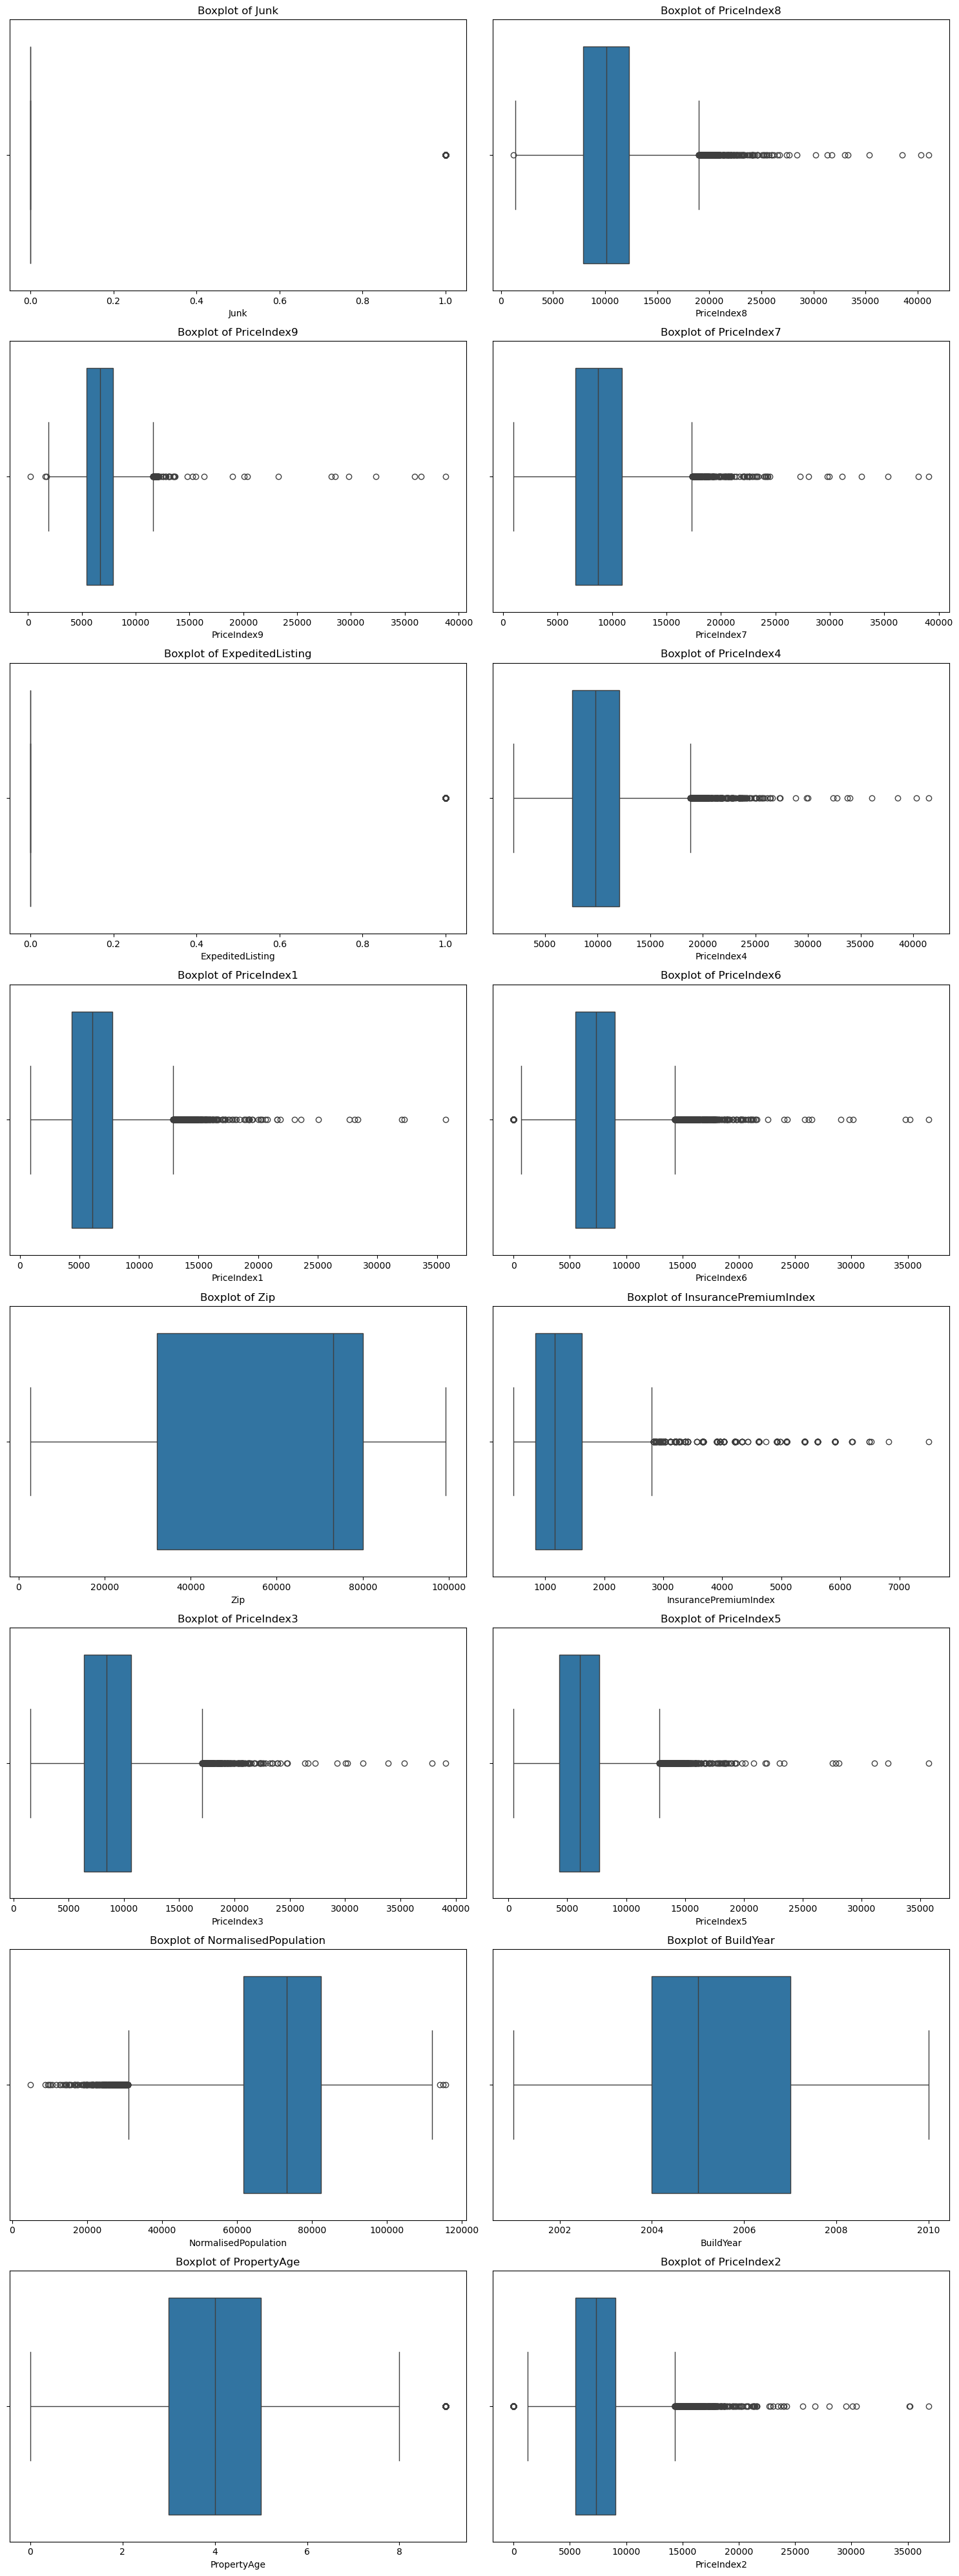

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numeric columns (both int and float) from the Property DataFrame
numeric_columns = Property.select_dtypes(include="number").columns

# Determine the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the required number of rows

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.boxplot(x=Property[col])  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set the title to show the column name

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [17]:
# Get all columns from Property that are not of object datatype
numeric_columns = Property.select_dtypes(exclude=['object']).columns

# Display the list of columns
print("Columns in Property that do not contain object datatype:")
print(numeric_columns)

Columns in Property that do not contain object datatype:
Index(['Junk', 'PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
       'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'Zip',
       'InsurancePremiumIndex', 'PriceIndex3', 'PriceIndex5',
       'NormalisedPopulation', 'BuildYear', 'PropertyAge', 'PriceIndex2'],
      dtype='object')


In [19]:
# Define the function to remove outliers using IQR
def remove_outliers(Property, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = Property[col].quantile(0.25)
    q3 = Property[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile Range (IQR)

    # Define lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filter out the outliers by keeping only the data within the bounds
    filtered_data = Property[(Property[col] >= lower_bound) & (Property[col] <= upper_bound)]
    
    return filtered_data

# List of specific columns to apply the outlier removal
specific_columns = ['PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
                    'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'Zip',
                    'InsurancePremiumIndex', 'PriceIndex3', 'PriceIndex5',
                    'NormalisedPopulation', 'BuildYear', 'PropertyAge', 'PriceIndex2']

# Remove outliers for each specific column
for col in specific_columns:
    if col in Property.columns:  # Check if the column exists in the DataFrame
        Property = remove_outliers(Property, col)



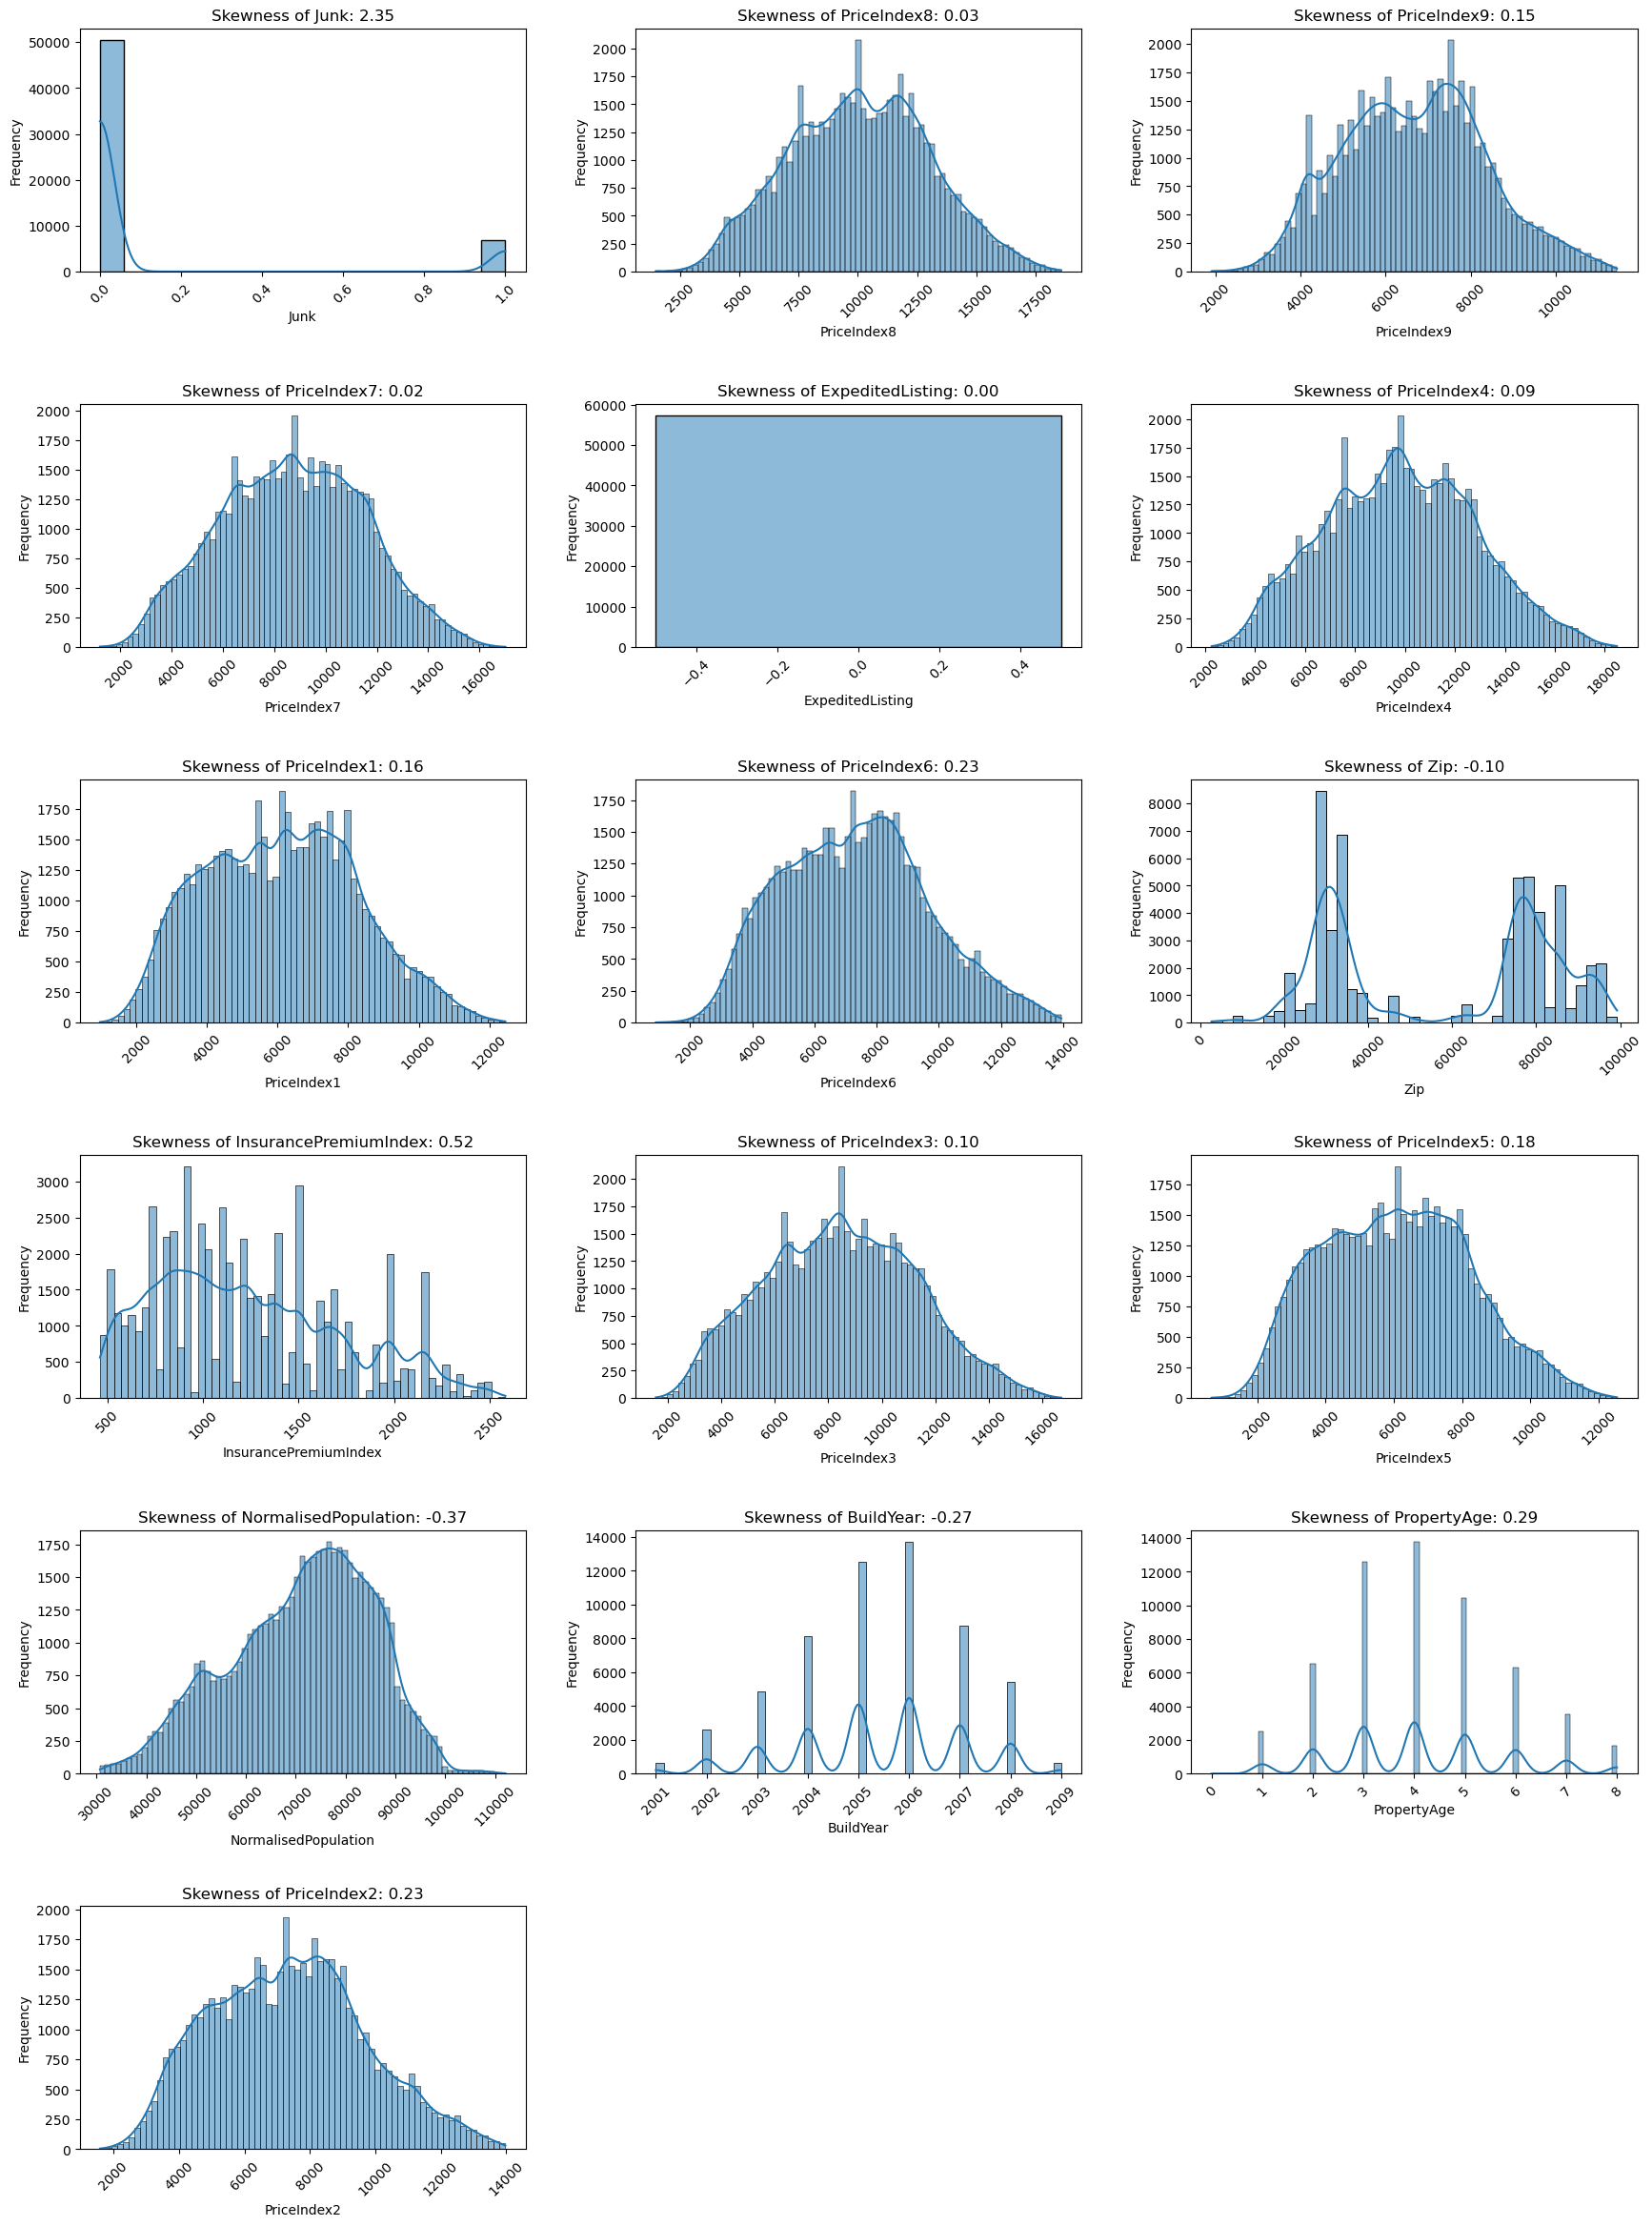

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select all numeric columns (int and float) from Property DataFrame
numeric_columns = Property.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows required to fit 3 plots per row
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Ensure enough rows for all columns

# Create a figure with subplots
plt.figure(figsize=(18, 4 * n_rows))  # Dynamic figure size based on rows

# Loop through each numeric column and create a histogram with KDE
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid with n_rows and 3 columns
    sns.histplot(Property[col], kde=True)  # Plot histogram with KDE
    plt.title(f'Skewness of {col}: {Property[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout(pad=3.0)  # Increased padding between subplots
plt.show()


In [41]:
# Save the first 1000 rows of the Property DataFrame to a CSV file
file_path = r'F:\jupyter\Property_columns.csv'  # Replace with your path
Property.head(1000).to_csv(file_path, index=False)

print(f'File saved to: {file_path}')


File saved to: F:\jupyter\Property_columns.csv


In [21]:
Property['ListDate'] = pd.to_datetime(Property['ListDate'])
Property = Property.sort_values(by='ListDate', ascending=False)
Property['Rank_Encoded'] = range(1, len(Property) + 1)
print(Property['Rank_Encoded'],Property['ListDate'])

43108        1
15885        2
8774         3
51489        4
17877        5
         ...  
26835    57757
36580    57758
43475    57759
49836    57760
4226     57761
Name: Rank_Encoded, Length: 57761, dtype: int64 43108   2010-12-30
15885   2010-12-30
8774    2010-12-30
51489   2010-12-30
17877   2010-12-30
           ...    
26835   2009-01-05
36580   2009-01-05
43475   2009-01-05
49836   2009-01-05
4226    2009-01-05
Name: ListDate, Length: 57761, dtype: datetime64[ns]





###############################Mean values#######################################

In [20]:

import pandas as pd

# List of columns for which target-based encoding is needed
columns_to_encode = ['Agency', 'RegionType', 'Facade', 'Channel','AreaIncomeType','PlotType']

# Target column
target_column = 'Junk'

# Loop through the columns and create target-based encoding
for col in columns_to_encode:
    # Calculate target mean for each category in the column
    target_mean = Property.groupby(col)[target_column].mean()
    
    # Create the encoded column with the mean target value
    Property[f'en_{col}'] = Property[col].map(target_mean)



###Rankwise Encoding######

In [27]:
import pandas as pd

# List of columns for which target-based ranking is needed
columns_to_encode = ['Agency', 'RegionType', 'Facade', 'Channel', 'AreaIncomeType', 'PlotType']

# Target column
target_column = 'Junk'

# Loop through the columns and create target-based rankings
for col in columns_to_encode:
    # Calculate target mean for each category in the column
    target_mean = Property.groupby(col)[target_column].mean()
    
    # Sort the mean values and rank them
    target_rank = target_mean.rank(method='dense', ascending=True).astype(int)
    
    # Create the encoded column with the rank values
    Property[f'rank_{col}'] = Property[col].map(target_rank)


In [25]:
# List of columns to drop
columns_to_drop = ['en_Agency', 'en_RegionType', 'en_Facade', 'en_Channel', 'en_AreaIncomeType', 'en_PlotType']

# Drop the columns from the Property DataFrame
Property = Property.drop(columns=columns_to_drop)

# Check if the columns are removed
print(Property.head())


KeyError: "['en_Agency', 'en_RegionType', 'en_Facade', 'en_Channel', 'en_AreaIncomeType', 'en_PlotType'] not found in axis"

In [29]:
Property.columns

Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType', 'Architecture',
       'PriceIndex3', 'PriceIndex5', 'SubModel', 'Facade', 'State',
       'NormalisedPopulation', 'BuildYear', 'RegionType', 'PropertyAge',
       'PriceIndex2', 'Rank_Encoded', 'rank_Agency', 'rank_RegionType',
       'rank_Facade', 'rank_Channel', 'rank_AreaIncomeType', 'rank_PlotType'],
      dtype='object')

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming Property is your DataFrame
columns_to_scale = ['PriceIndex8', 
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
        'Zip', 'InsurancePremiumIndex',
       'PriceIndex3', 'PriceIndex5',
       'NormalisedPopulation', 'BuildYear', 'PropertyAge',
       'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
       'rank_AreaIncomeType', 'rank_PlotType'
       ]

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns and transform the data
Property[columns_to_scale] = scaler.fit_transform(Property[columns_to_scale])

# Display the DataFrame after scaling
--print(Property[columns_to_scale].head())


       PriceIndex8  ExpeditedListing  PriceIndex4  PriceIndex1  PriceIndex6  \
43108     0.568232               0.0     0.530060     0.422845     0.573857   
15885     0.449486               0.0     0.449326     0.257870     0.389591   
8774      0.419161               0.0     0.385638     0.249785     0.339350   
51489     0.823897               0.0     0.780690     0.789007     0.885454   
17877     0.385769               0.0     0.343425     0.268192     0.292419   

            Zip  InsurancePremiumIndex  PriceIndex3  PriceIndex5  \
43108  0.264452               0.646983     0.521989     0.532939   
15885  0.264452               0.155327     0.371794     0.349105   
8774   0.305360               0.496791     0.386563     0.294316   
51489  0.264452               0.145914     0.804576     0.864465   
17877  0.264452               0.129653     0.381882     0.308362   

       NormalisedPopulation  BuildYear  PropertyAge  PriceIndex2  \
43108              0.573039      0.625        0.

TypeError: bad operand type for unary -: 'NoneType'

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming Property DataFrame is already defined and loaded

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
       'rank_AreaIncomeType', 'rank_PlotType'  ]]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define parameter grid for Randomized Search CV
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet']
}

# Set up the randomized search with K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=20, 
                                   cv=kfold, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model using Randomized Search CV
random_search.fit(X_train_scaled, y_train)

# Get the best model from random search
best_log_reg = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Best parameters from Randomized Search CV
print("Best Parameters:")
print(random_search.best_params_)


C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1182, in f

Confusion Matrix:
[[15213     1]
 [ 2115     0]]
Precision: 0.00
Recall: 0.00
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     15214
           1       0.00      0.00      0.00      2115

    accuracy                           0.88     17329
   macro avg       0.44      0.50      0.47     17329
weighted avg       0.77      0.88      0.82     17329

Best Parameters:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming Property DataFrame is already defined and loaded

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
       'rank_AreaIncomeType', 'rank_PlotType'  ]]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for Randomized Search CV
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of trees
    'max_depth': np.arange(5, 20, 5),           # Depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples in a leaf node
    'bootstrap': [True, False]                  # Whether bootstrap samples are used
}

# Set up the randomized search with K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=20, 
                                   cv=kfold, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model using Randomized Search CV
random_search.fit(X_train_scaled, y_train)

# Get the best model from random search
best_rf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)

# Best parameters from Randomized Search CV
print("Best Parameters:")
print(random_search.best_params_)


Confusion Matrix:
[[15205     9]
 [ 2088    27]]
Precision: 0.75
Recall: 0.01
Accuracy: 0.88
ROC-AUC: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     15214
           1       0.75      0.01      0.03      2115

    accuracy                           0.88     17329
   macro avg       0.81      0.51      0.48     17329
weighted avg       0.86      0.88      0.82     17329

Best Parameters:
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 15, 'bootstrap': False}


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load your Property DataFrame
# Assuming Property DataFrame is already defined and loaded

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
              'rank_AreaIncomeType', 'rank_PlotType']]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for Randomized Search CV
param_grid = {
    'classifier__n_estimators': np.arange(100, 1000, 100),  # Number of trees
    'classifier__max_depth': np.arange(5, 20, 5),           # Depth of the tree
    'classifier__min_samples_split': [2, 5, 10],            # Minimum number of samples to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],              # Minimum number of samples in a leaf node
    'classifier__bootstrap': [True, False]                  # Whether bootstrap samples are used
}

# Create an imbalanced pipeline with SMOTE
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),              # Standardizing the features
    ('smote', SMOTE(random_state=42)),        # Applying SMOTE to handle imbalance
    ('classifier', rf)                        # Classifier
])

# Set up the randomized search with K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=20, 
                                   cv=kfold, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model using Randomized Search CV
random_search.fit(X_train, y_train)

# Get the best model from random search
best_pipeline = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)

# Best parameters from Randomized Search CV
print("Best Parameters:")
print(random_search.best_params_)


Confusion Matrix:
[[13629  1585]
 [ 1493   622]]
Precision: 0.28
Recall: 0.29
Accuracy: 0.82
ROC-AUC: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     15214
           1       0.28      0.29      0.29      2115

    accuracy                           0.82     17329
   macro avg       0.59      0.59      0.59     17329
weighted avg       0.83      0.82      0.82     17329

Best Parameters:
{'classifier__n_estimators': 800, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 15, 'classifier__bootstrap': False}


In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load your Property DataFrame
# Assuming Property DataFrame is already defined and loaded

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
              'rank_AreaIncomeType', 'rank_PlotType']]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the base classifier
rf = RandomForestClassifier(random_state=42)

# Bagging with multiple samples (bootstrapping)
bagging_model = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42, 
                                  max_samples=0.7, bootstrap=True, n_jobs=-1)

# Fit the Bagging model
bagging_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load your Property DataFrame
# Assuming Property DataFrame is already defined and loaded

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
              'rank_AreaIncomeType', 'rank_PlotType']]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the base classifier
rf = RandomForestClassifier(random_state=42)

# Bagging with multiple samples (bootstrapping)
bagging_model = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42, 
                                  max_samples=0.7, bootstrap=True, n_jobs=-1)

# Fit the Bagging model
bagging_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[15209     5]
 [ 2094    21]]
Precision: 0.81
Recall: 0.01
Accuracy: 0.88
ROC-AUC: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     15214
           1       0.81      0.01      0.02      2115

    accuracy                           0.88     17329
   macro avg       0.84      0.50      0.48     17329
weighted avg       0.87      0.88      0.82     17329



In [40]:
Property['Junk'].value_counts()/len(Property)*100

Junk
0    88.005748
1    11.994252
Name: count, dtype: float64

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Load your Property DataFrame
# Assuming Property DataFrame is already defined and loaded

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
              'rank_AreaIncomeType', 'rank_PlotType',
              'En_InteriorsStyle_0', 'En_InteriorsStyle_1', 'En_InteriorsStyle_2','En_InteriorsStyle_3', 'En_InteriorsStyle_4', 'En_InteriorsStyle_5',
              'En_InteriorsStyle_6', 'En_InteriorsStyle_7', 'En_Material_0','En_Material_1', 'En_Material_2', 'En_Material_3', 'En_Material_4',
              'En_Material_5', 'En_Material_6', 'En_Material_7', 'En_Architecture_0','En_Architecture_1', 'En_Architecture_2', 'En_Architecture_3',
              'En_Architecture_4', 'En_Architecture_5', 'En_Architecture_6','En_Architecture_7', 'En_SubModel_0', 'En_SubModel_1', 'En_SubModel_2',
              'En_SubModel_3', 'En_SubModel_4', 'En_SubModel_5', 'En_SubModel_6','En_SubModel_7', 'En_State_0', 'En_State_1', 'En_State_2', 'En_State_3',
              'En_State_4', 'En_State_5', 'En_State_6', 'En_State_7'
             ]]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Apply undersampling to the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Train a RandomForestClassifier on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[14818   396]
 [ 1905   210]]
Precision: 0.35
Recall: 0.10
Accuracy: 0.87
ROC-AUC: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     15214
           1       0.35      0.10      0.15      2115

    accuracy                           0.87     17329
   macro avg       0.62      0.54      0.54     17329
weighted avg       0.82      0.87      0.83     17329



In [35]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [36]:
Property.columns

Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType', 'Architecture',
       'PriceIndex3', 'PriceIndex5', 'SubModel', 'Facade', 'State',
       'NormalisedPopulation', 'BuildYear', 'RegionType', 'PropertyAge',
       'PriceIndex2', 'Rank_Encoded', 'rank_Agency', 'rank_RegionType',
       'rank_Facade', 'rank_Channel', 'rank_AreaIncomeType', 'rank_PlotType'],
      dtype='object')

In [39]:
import pandas as pd
from category_encoders import HashingEncoder

# Initialize Hashing Encoder
hashing_encoder = HashingEncoder(n_components=8)

# Specify columns to encode (from the original Property DataFrame)
columns_to_encode = ['InteriorsStyle', 'Material', 'Architecture', 'SubModel', 'State']

# Initialize an empty DataFrame to hold encoded columns
df_encoded = pd.DataFrame()

# Apply Hashing Encoding to each column separately
for col in columns_to_encode:
    encoded_col = hashing_encoder.fit_transform(Property[[col]])  # Use the original Property DataFrame
    
    # Rename columns dynamically for each encoded column
    new_column_names = [f"En_{col}_{i}" for i in range(hashing_encoder.n_components)]
    encoded_col.columns = new_column_names
    
    # Concatenate the encoded columns to the final DataFrame
    df_encoded = pd.concat([df_encoded, encoded_col], axis=1)

# Display the resulting DataFrame with dynamically named columns
print("Encoded DataFrame:")
print(df_encoded.head())

# Function to check for collisions (i.e., identical columns)
def check_for_collisions(encoded_df):
    collisions = {}
    columns = encoded_df.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            # Check if two columns are identical
            if encoded_df[col1].equals(encoded_df[col2]):
                if col1 not in collisions:
                    collisions[col1] = []
                collisions[col1].append(col2)
    return collisions

# Check for hash collisions
collisions = check_for_collisions(df_encoded)

# Display collision results
if collisions:
    print("\nCollisions detected between the following columns:")
    for col1, collided_columns in collisions.items():
        print(f"{col1} overlaps with {', '.join(collided_columns)}")
else:
    print("\nNo collisions detected.")


Encoded DataFrame:
       En_InteriorsStyle_0  En_InteriorsStyle_1  En_InteriorsStyle_2  \
43108                    0                    0                    1   
15885                    0                    1                    0   
8774                     0                    0                    0   
51489                    0                    1                    0   
17877                    0                    0                    0   

       En_InteriorsStyle_3  En_InteriorsStyle_4  En_InteriorsStyle_5  \
43108                    0                    0                    0   
15885                    0                    0                    0   
8774                     0                    0                    0   
51489                    0                    0                    0   
17877                    0                    0                    0   

       En_InteriorsStyle_6  En_InteriorsStyle_7  En_Material_0  En_Material_1  \
43108                    0        

In [45]:
Property = pd.concat([Property, df_encoded], axis=1)

In [86]:
print(result_df.head())

       Junk InteriorsStyle  PriceIndex8   ListDate Material  PriceIndex9  \
43108     0           RCQE     0.568232 2010-12-30     X7IX         7570   
15885     0           WEGU     0.449486 2010-12-30     ZCI3         5145   
8774      1           V3Y1     0.419161 2010-12-30     ZCI3         7400   
51489     0           ANUW     0.823897 2010-12-30     PRN0         8275   
17877     0           WJ9C     0.385769 2010-12-30     ZVY4         5900   

      Agency AreaIncomeType  PriceIndex7  ExpeditedListing  ...  \
43108   CAT1              B       9469.0               0.0  ...   
15885   CAT3              B       7881.0               0.0  ...   
8774    CAT2              B       7132.0               0.0  ...   
51489   CAT3              A      14894.0               0.0  ...   
17877  OTHER              B       7717.0               0.0  ...   

       En_SubModel_6  En_SubModel_7  En_State_0 En_State_1  En_State_2  \
43108              0              1           1          0        

In [47]:
Property.columns

Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType', 'Architecture',
       'PriceIndex3', 'PriceIndex5', 'SubModel', 'Facade', 'State',
       'NormalisedPopulation', 'BuildYear', 'RegionType', 'PropertyAge',
       'PriceIndex2', 'Rank_Encoded', 'rank_Agency', 'rank_RegionType',
       'rank_Facade', 'rank_Channel', 'rank_AreaIncomeType', 'rank_PlotType',
       'En_InteriorsStyle_0', 'En_InteriorsStyle_1', 'En_InteriorsStyle_2',
       'En_InteriorsStyle_3', 'En_InteriorsStyle_4', 'En_InteriorsStyle_5',
       'En_InteriorsStyle_6', 'En_InteriorsStyle_7', 'En_Material_0',
       'En_Material_1', 'En_Material_2', 'En_Material_3', 'En_Material_4',
       'En_Material_5', 'En_Material_6', 'En_Material_7', 'En_Architecture_0',
       'En_Architecture_1', 'En_Architecture_2

Randomforest Classifier

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
              'rank_AreaIncomeType', 'rank_PlotType',
              'En_InteriorsStyle_0', 'En_InteriorsStyle_1', 'En_InteriorsStyle_2','En_InteriorsStyle_3', 'En_InteriorsStyle_4', 'En_InteriorsStyle_5',
              'En_InteriorsStyle_6', 'En_InteriorsStyle_7', 'En_Material_0','En_Material_1', 'En_Material_2', 'En_Material_3', 'En_Material_4',
              'En_Material_5', 'En_Material_6', 'En_Material_7', 'En_Architecture_0','En_Architecture_1', 'En_Architecture_2', 'En_Architecture_3',
              'En_Architecture_4', 'En_Architecture_5', 'En_Architecture_6','En_Architecture_7', 'En_SubModel_0', 'En_SubModel_1', 'En_SubModel_2',
              'En_SubModel_3', 'En_SubModel_4', 'En_SubModel_5', 'En_SubModel_6','En_SubModel_7', 'En_State_0', 'En_State_1', 'En_State_2', 'En_State_3',
              'En_State_4', 'En_State_5', 'En_State_6', 'En_State_7'
             ]]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the oversampling (SMOTE) and undersampling strategy
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling strategy
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Adjust undersampling

# Create pipeline with scaling, oversampling, and undersampling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('over', over), 
                           ('under', under), 
                           ('model', RandomForestClassifier(random_state=42))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[14705   509]
 [ 1828   287]]
Precision: 0.36
Recall: 0.14
F1 Score: 0.20
Accuracy: 0.87
ROC-AUC: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     15214
           1       0.36      0.14      0.20      2115

    accuracy                           0.87     17329
   macro avg       0.62      0.55      0.56     17329
weighted avg       0.82      0.87      0.84     17329



#SVC model

In [67]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
              'rank_AreaIncomeType', 'rank_PlotType',
              'En_InteriorsStyle_0', 'En_InteriorsStyle_1', 'En_InteriorsStyle_2','En_InteriorsStyle_3', 'En_InteriorsStyle_4', 'En_InteriorsStyle_5',
              'En_InteriorsStyle_6', 'En_InteriorsStyle_7', 'En_Material_0','En_Material_1', 'En_Material_2', 'En_Material_3', 'En_Material_4',
              'En_Material_5', 'En_Material_6', 'En_Material_7', 'En_Architecture_0','En_Architecture_1', 'En_Architecture_2', 'En_Architecture_3',
              'En_Architecture_4', 'En_Architecture_5', 'En_Architecture_6','En_Architecture_7', 'En_SubModel_0', 'En_SubModel_1', 'En_SubModel_2',
              'En_SubModel_3', 'En_SubModel_4', 'En_SubModel_5', 'En_SubModel_6','En_SubModel_7', 'En_State_0', 'En_State_1', 'En_State_2', 'En_State_3',
              'En_State_4', 'En_State_5', 'En_State_6', 'En_State_7'
             ]]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the oversampling (SMOTE) and undersampling strategy
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling strategy
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Adjust undersampling

# Create pipeline with scaling, oversampling, and undersampling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('over', over), 
                           ('under', under), 
                           ('model', SVC(random_state=42, class_weight='balanced'))])  # Use SVC instead of RandomForest

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[11894  3320]
 [ 1181   934]]
Precision: 0.22
Recall: 0.44
F1 Score: 0.29
Accuracy: 0.74
ROC-AUC: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     15214
           1       0.22      0.44      0.29      2115

    accuracy                           0.74     17329
   macro avg       0.56      0.61      0.57     17329
weighted avg       0.83      0.74      0.77     17329



In [76]:
##XGB

In [73]:
import pandas as pd
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded',  'rank_Agency', 'rank_RegionType', 'rank_Facade', 'rank_Channel',
              'rank_AreaIncomeType', 'rank_PlotType',
              'En_InteriorsStyle_0', 'En_InteriorsStyle_1', 'En_InteriorsStyle_2','En_InteriorsStyle_3', 'En_InteriorsStyle_4', 'En_InteriorsStyle_5',
              'En_InteriorsStyle_6', 'En_InteriorsStyle_7', 'En_Material_0','En_Material_1', 'En_Material_2', 'En_Material_3', 'En_Material_4',
              'En_Material_5', 'En_Material_6', 'En_Material_7', 'En_Architecture_0','En_Architecture_1', 'En_Architecture_2', 'En_Architecture_3',
              'En_Architecture_4', 'En_Architecture_5', 'En_Architecture_6','En_Architecture_7', 'En_SubModel_0', 'En_SubModel_1', 'En_SubModel_2',
              'En_SubModel_3', 'En_SubModel_4', 'En_SubModel_5', 'En_SubModel_6','En_SubModel_7', 'En_State_0', 'En_State_1', 'En_State_2', 'En_State_3',
              'En_State_4', 'En_State_5', 'En_State_6', 'En_State_7'
             ]]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the oversampling (SMOTE) and undersampling strategy
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling strategy
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Adjust undersampling

# Create pipeline with scaling, oversampling, and undersampling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('over', over), 
                           ('under', under), 
                           ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', 
                                                   n_estimators=100, max_depth=6, learning_rate=0.1))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[15119    95]
 [ 2025    90]]
Precision: 0.49
Recall: 0.04
F1 Score: 0.08
Accuracy: 0.88
ROC-AUC: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     15214
           1       0.49      0.04      0.08      2115

    accuracy                           0.88     17329
   macro avg       0.68      0.52      0.51     17329
weighted avg       0.83      0.88      0.83     17329

